In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv("UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [115]:
df.shape

(1156, 7)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [117]:
df['PURPOSE'] = df['PURPOSE'].fillna("NOT")

In [118]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

In [119]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

In [120]:
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['END_DATE']).hour

# changing into categories of day and night
df['day-night'] = pd.cut(x=df['time'],
                         bins = [0,10,15,19,24],
                         labels = ['Morning','Afternoon','Evening','Night'])



In [121]:
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night


In [122]:
df.isnull().sum()

START_DATE    735
END_DATE      736
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE         0
date          735
time          736
day-night     750
dtype: int64

In [123]:
df.dropna(inplace=True)

In [124]:
df.drop_duplicates(inplace=True)


### Data Visualization

In [125]:
obj = (df.dtypes =='object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
    unique_values[col] = df[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 107, 'STOP': 111, 'PURPOSE': 7, 'date': 113}

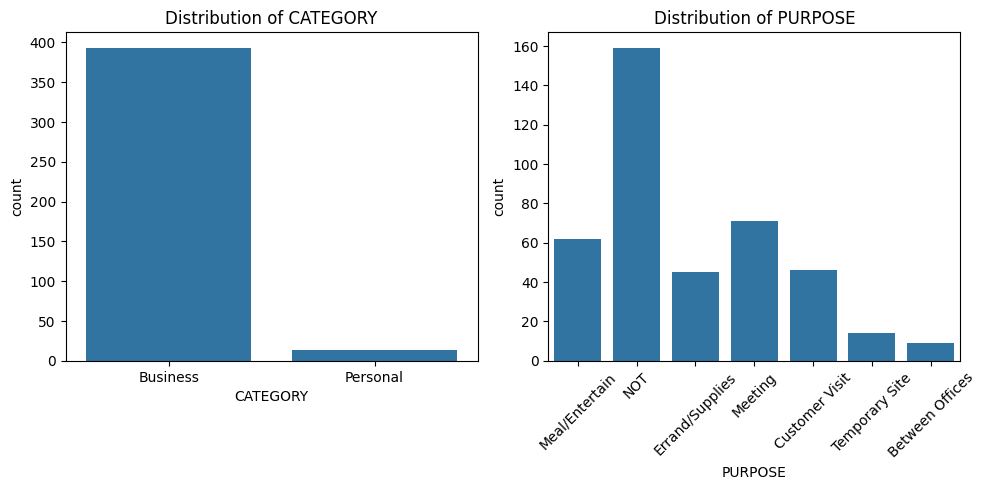

In [126]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=df, x= 'CATEGORY')
plt.xticks(rotation=0)
plt.title('Distribution of CATEGORY')

plt.subplot(1,2,2)
sns.countplot(data=df, x='PURPOSE')
plt.xticks(rotation=45)
plt.title('Distribution of PURPOSE')

plt.tight_layout()
plt.show()


#### Same-same but Different

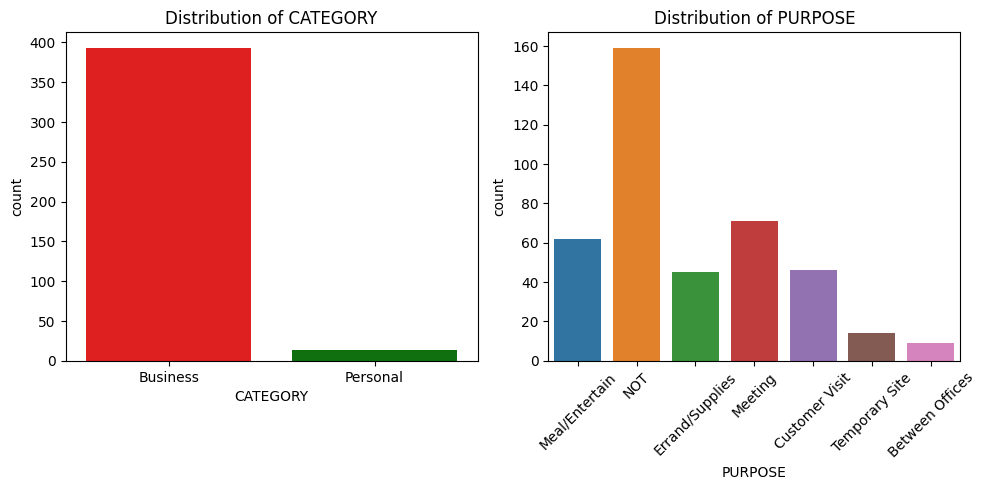

In [127]:
custom_palette = {
    'Business':'red',
    'Personal':'green'
}

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=df, x= 'CATEGORY', hue='CATEGORY',palette=custom_palette,legend=False)
plt.xticks(rotation=0)
plt.title('Distribution of CATEGORY')

plt.subplot(1,2,2)
sns.countplot(data=df, x='PURPOSE',hue='PURPOSE',palette=colors,legend=False)
plt.xticks(rotation=45)
plt.title('Distribution of PURPOSE')

plt.tight_layout()
plt.show()


([0, 1, 2, 3],
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

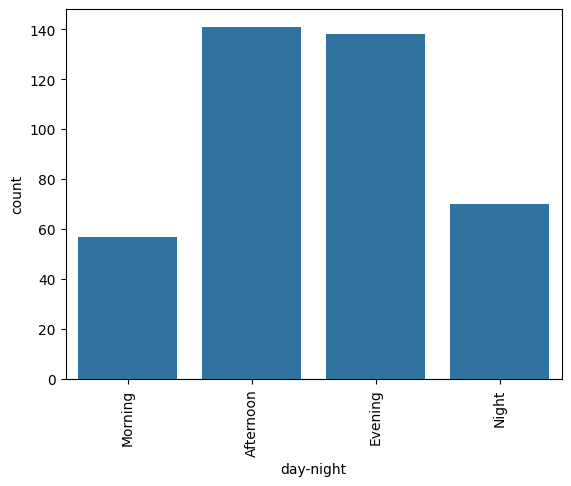

In [128]:
sns.countplot(data=df, x='day-night')
plt.xticks(rotation=90)

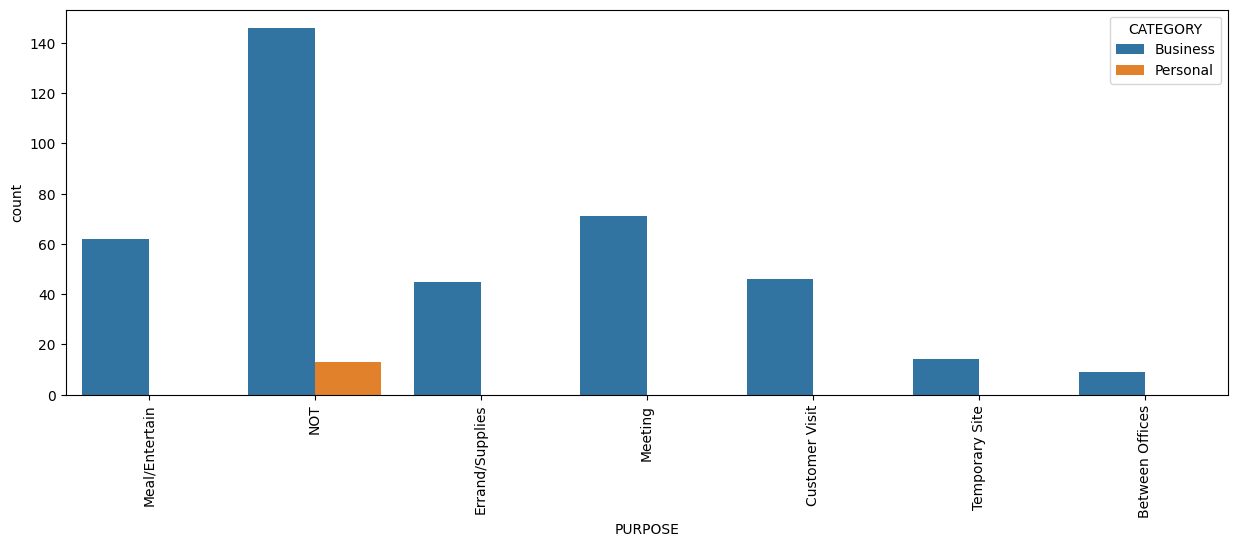

In [129]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

In [130]:
from sklearn.preprocessing import OneHotEncoder

object_cols = ['CATEGORY','PURPOSE']
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)
df_final =df.drop(object_cols,axis=1)
df = pd.concat([df_final,OH_cols], axis=1)


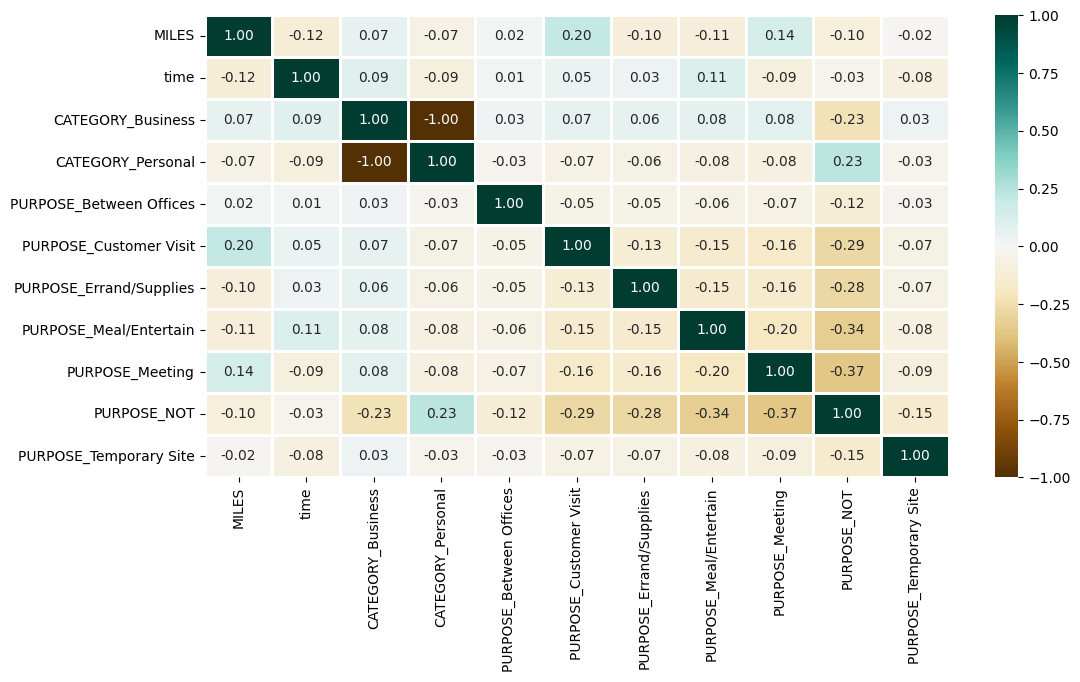

In [131]:
numeric_df = df.select_dtypes(include=[float,int])

plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)
plt.show()

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

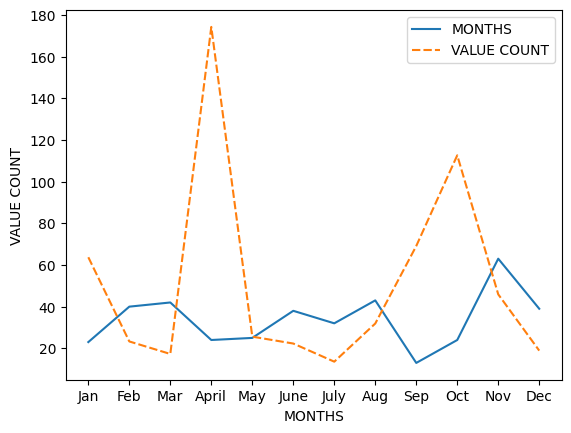

In [132]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month
month_label = {1.0:'Jan', 2.0:'Feb', 3.0:'Mar', 4.0:'April', 5.0:'May', 6.0:'June', 7.0:'July', 8.0:'Aug', 9.0:'Sep', 10.0:'Oct', 11.0:'Nov', 12.0:'Dec'}

df['MONTH'] = df.MONTH.map(month_label)

mon = df.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
data = pd.DataFrame({'MONTHS':mon.values,
                   'VALUE COUNT': df.groupby('MONTH',
                                             sort=False)['MILES'].max()})

p = sns.lineplot(data=data)
p.set(xlabel='MONTHS', ylabel='VALUE COUNT')

In [134]:
df['DAY'] = df['START_DATE'].dt.weekday
day_label = {0:'Mon', 1:'Tues', 2:'Wed', 3:'Thus', 4:'Fri', 5:'Sat', 6:'Sun'}
df['DAY'] =df['DAY'].map(day_label)


Text(0, 0.5, 'COUNT')

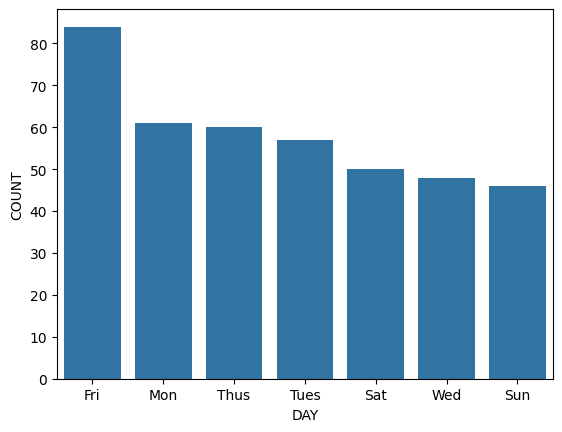

In [135]:
day_label = df.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

<Axes: xlabel='MILES'>

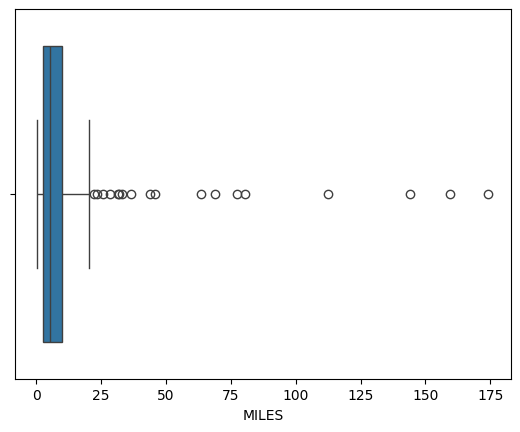

In [137]:
sns.boxplot(data=df, x='MILES')

<Axes: xlabel='MILES'>

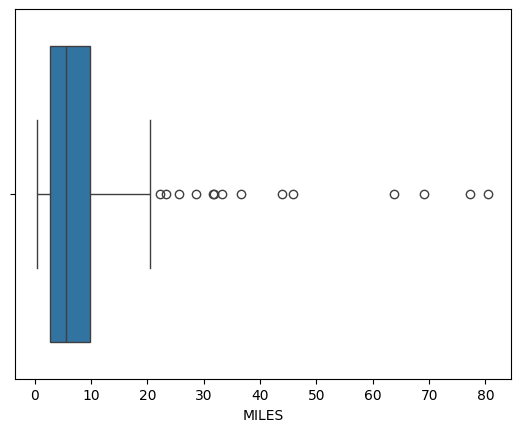

In [139]:
sns.boxplot(x=df[df['MILES']<100]['MILES'], orient='h')

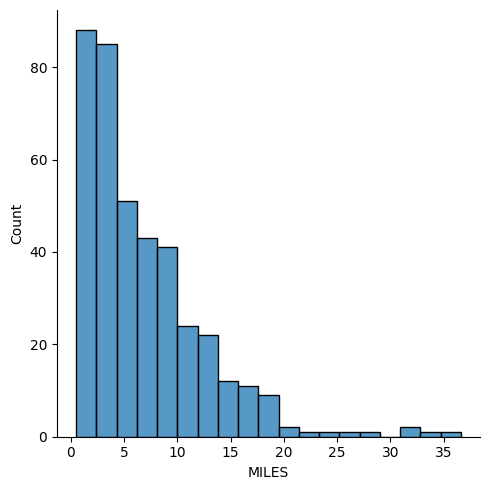

In [141]:
sns.displot(x=df[df['MILES']<40]['MILES'])